<a href="https://colab.research.google.com/github/hasiburrahman1/NLP/blob/master/Copy_of_train_Embedding_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import csv
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
tf.__version__ 

'2.2.0'

In [ ]:
data_raw = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/bioasq_manual_100/test.tsv",sep='\t',encoding = "ISO-8859-1")

In [ ]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])

Number of rows in data = 9064
Number of columns in data = 3


In [ ]:
data_raw.head()

,label,question,answer_candidate
0,0,Do lincRNAs play a role in human cancer?,Genome-wide identification and predictive mode...
1,0,Do lincRNAs play a role in human cancer?,As expected we found lincRNAs to be present in...
2,0,Do lincRNAs play a role in human cancer?,Functional relevance of lincRNAs was further e...
3,0,Do lincRNAs play a role in human cancer?,To date the mechanism of lincRNAs polyadenylat...
4,0,Do lincRNAs play a role in human cancer?,The functional impact of several long intergen...


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9064 entries, 0 to 9063
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             9064 non-null   int64 
 1   question          9064 non-null   object
 2   answer_candidate  9064 non-null   object
dtypes: int64(1), object(2)
memory usage: 212.6+ KB


##### Preprocessing 

In [ ]:
# Removing punctuations
data = data_raw.iloc[:,1:3]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1 = [i for i in range(2)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(5)

,0,1
0,Do lincRNAs play a role in human cancer,Genome wide identification and predictive mode...
1,Do lincRNAs play a role in human cancer,As expected we found lincRNAs to be present in...
2,Do lincRNAs play a role in human cancer,Functional relevance of lincRNAs was further e...
3,Do lincRNAs play a role in human cancer,To date the mechanism of lincRNAs polyadenylat...
4,Do lincRNAs play a role in human cancer,The functional impact of several long intergen...


In [ ]:
' '.join(str(x) for x in data.iloc[0,0:3])

'Do lincRNAs play a role in human cancer  Genome wide identification and predictive modeling of lincRNAs polyadenylation in cancer genome'

In [ ]:
# Convertng headlines to lower case
for index in new_Index:
    data[index] = data[index].str.lower()
data.head(5)    

,0,1
0,do lincrnas play a role in human cancer,genome wide identification and predictive mode...
1,do lincrnas play a role in human cancer,as expected we found lincrnas to be present in...
2,do lincrnas play a role in human cancer,functional relevance of lincrnas was further e...
3,do lincrnas play a role in human cancer,to date the mechanism of lincrnas polyadenylat...
4,do lincrnas play a role in human cancer,the functional impact of several long intergen...


In [ ]:
' '.join(str(x) for x in data.iloc[0,0:3])

'do lincrnas play a role in human cancer  genome wide identification and predictive modeling of lincrnas polyadenylation in cancer genome'

In [ ]:
corpus = []
for row in range(0,len(data.index)):
    corpus.append(' '.join(str(x) for x in data.iloc[row,0:3]))

In [ ]:
corpus[0]

'do lincrnas play a role in human cancer  genome wide identification and predictive modeling of lincrnas polyadenylation in cancer genome'

In [ ]:
corpus

['do lincrnas play a role in human cancer  genome wide identification and predictive modeling of lincrnas polyadenylation in cancer genome',
 'do lincrnas play a role in human cancer  as expected we found lincrnas to be present in cd   monocytes of ra patients',
 'do lincrnas play a role in human cancer  functional relevance of lincrnas was further examined by biochemical assays',
 'do lincrnas play a role in human cancer  to date the mechanism of lincrnas polyadenylation related to cancer is rarely fully understood yet',
 'do lincrnas play a role in human cancer  the functional impact of several long intergenic non coding rnas lincrnas has been characterized in previous studies',
 'do lincrnas play a role in human cancer  in total     snps in nine target genes revealed by gwas studies of other ethnic groups and four related lincrnas were genotyped in     samples     nb patients and     healthy controls',
 'do lincrnas play a role in human cancer  integrative genomic analyses suggested

#### Implement BAG OF WORDS

In [ ]:
'''
from sklearn.feature_extraction.text import CountVectorizer

countvector=CountVectorizer(ngram_range=(2,2))
X=countvector.fit_transform(corpus)
'''

'\nfrom sklearn.feature_extraction.text import CountVectorizer\n\ncountvector=CountVectorizer(ngram_range=(2,2))\nX=countvector.fit_transform(corpus)\n'

#### TFidf Vectorizer

In [ ]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\ntfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,3))\nX=tfidf_v.fit_transform(corpus).toarray()\n'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

#### One hot representation

In [ ]:
### Vocabulary size
voc_size=15000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  3446,
  6939,
  3215,
  7745,
  13186,
  13748,
  1266,
  10524,
  1847,
  5346,
  12674,
  3446],
 [11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  1938,
  6383,
  11406,
  13870,
  10524,
  10142,
  7062,
  14584,
  5346,
  12254,
  7033,
  1266,
  14166,
  1991],
 [11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  14734,
  3903,
  1266,
  10524,
  5398,
  2794,
  8914,
  9396,
  6980,
  13797],
 [11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  10142,
  13524,
  13457,
  5301,
  1266,
  10524,
  1847,
  13530,
  10142,
  12674,
  1924,
  5658,
  9575,
  8113,
  3350],
 [11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  13457,
  14734,
  1737,
  1266,
  891,
  6516,
  3071,
  13801,
  13119,
  9582,
  10524,
  750,
  9748,
  58,
  5346,
  9349,
  4042],
 [11671,
  10524,
  6566,
  94,
  8150,
  5346,
  2292,
  12674,
  5346,
  3631,
  4610,
  5346,
  5449,

#### Embedding Representation

In [ ]:
sent_length = len(max(corpus, key=len))
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  5346 12674  3446]
 [    0     0     0 ...  1266 14166  1991]
 [    0     0     0 ...  9396  6980 13797]
 ...
 [    0     0     0 ... 12247   446  1139]
 [    0     0     0 ...  7810  9748  6539]
 [    0     0     0 ...  8408  7267 12910]]


In [ ]:
embedded_docs[0]

array([    0,     0,     0, ...,  5346, 12674,  3446], dtype=int32)

##### Get the Independent and Dependent Features

In [ ]:
len(embedded_docs)

9064

In [ ]:
y=pd.get_dummies(data_raw['label'])
y=y.iloc[:,1].values

In [ ]:
X=np.array(embedded_docs)
y=np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(9064, 2619)
(9064,)



Exploratory Data Analysis

In [ ]:
data.isnull().values.any()


False

Text(0, 0.5, 'Frequency')

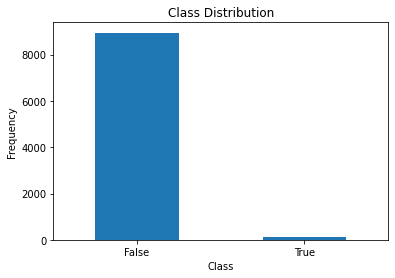

In [ ]:
LABELS = ["False", "True"]
count_classes = pd.value_counts(data_raw['label'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 

true = data_raw[data_raw['label']==1]

false = data_raw[data_raw['label']==0]

In [ ]:

print(true.shape,false.shape)

(117, 3) (8947, 3)


In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [ ]:
X_res.shape,y_res.shape

((17894, 2619), (17894,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 8947, 1: 117})
Resampled dataset shape Counter({0: 8947, 1: 8947})


###### Train Test Split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape

(11988, 2619)

In [ ]:
X_test.shape

(5906, 2619)

In [ ]:
y_train.shape

(11988,)

In [ ]:
y_test.shape

(5906,)

### LSTM model

In [ ]:
## Creating model

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2619, 40)          600000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 656,501
Trainable params: 656,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Creating Bidirectional LSTM model

embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2619, 40)          600000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 713,001
Trainable params: 713,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Creating LSTM with dropout ratio model

embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2619, 40)          600000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 713,001
Trainable params: 713,001
Non-trainable params: 0
_________________________________________________________________
None


##### LSTM Model Training

In [ ]:
### Finally Training
model2.fit(X_train,y_train,validation_data=(X_res, y_res),epochs=100,batch_size=10)

Epoch 1/50
1199/1199 [==============================] - 187s 156ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0199 - val_accuracy: 0.9966
Epoch 2/50
1199/1199 [==============================] - 184s 153ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0296 - val_accuracy: 0.9969
Epoch 3/50
1195/1199 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9997

##### Performance Metrics And Accuracy of LSTM model

In [ ]:
y_pred1= np.argmax(model1.predict(X_test), axis=-1) 

In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [ ]:
matrix=confusion_matrix(y_test,y_pred1)
print(matrix)

[[2954    0]
 [2952    0]]


In [ ]:
accuracy_score(y_test,y_pred1)

0.5001693193362682

In [ ]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2954
           1       0.00      0.00      0.00      2952

    accuracy                           0.50      5906
   macro avg       0.25      0.50      0.33      5906
weighted avg       0.25      0.50      0.33      5906



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest Classifier

In [ ]:
## implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

y_predict = randomclassifier.predict(X_test)

In [ ]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)
score=accuracy_score(y_test,y_predict)
print(score)

[[2954    0]
 [   2 2950]]
0.9996613613274636


In [ ]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2954
           1       1.00      1.00      1.00      2952

    accuracy                           1.00      5906
   macro avg       1.00      1.00      1.00      5906
weighted avg       1.00      1.00      1.00      5906

